In [1]:
import pandas as pd
import numpy as np

import spacy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
nlp = spacy.load("en_core_web_sm")


In [3]:
file_path = "fake_reviews_dataset - fake_reviews_dataset.csv"
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,category,rating,label,text_
1,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
2,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
3,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
4,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."


In [4]:
df.columns = ["category", "rating", "authenticity", "review"]

df = df[df["category"] != "category"]
df = df.dropna()

df.head()


,category,rating,authenticity,review
1,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
2,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
3,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
4,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
5,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [5]:
def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = []
    
    for token in doc:
        if token.is_stop == False and token.is_punct == False and token.is_space == False:
            tokens.append(token.lemma_)
    
    return " ".join(tokens)


In [ ]:
df["clean_review"] = df["review"].apply(spacy_preprocess)

df[["review", "clean_review"]].head()

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_review"]).toarray()

y_category = df["category"]


NameError: name 'TfidfVectorizer' is not defined

In [ ]:
le = LabelEncoder()
y_cat_encoded = le.fit_transform(y_category)

y_cat_onehot = to_categorical(y_cat_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat_onehot, test_size=0.2, random_state=42)


In [ ]:
cat_model = Sequential()

cat_model.add(Dense(512, activation='relu', input_shape=(5000,)))

cat_model.add(Dense(256, activation='relu'))

cat_model.add(Dense(y_cat_onehot.shape[1], activation='softmax'))

cat_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cat_model.summary()


c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,694,410 (10.28 MB)

 Trainable params: 2,694,410 (10.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cat = cat_model.fit(
    X_train_c, y_train_c,
    epochs=5,
    batch_size=256,
    validation_split=0.1
)


Epoch 1/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.6158 - loss: 1.2072 - val_accuracy: 0.7722 - val_loss: 0.6451
Epoch 2/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8189 - loss: 0.5219 - val_accuracy: 0.7802 - val_loss: 0.6224
Epoch 3/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.8653 - loss: 0.3920 - val_accuracy: 0.7703 - val_loss: 0.6718
Epoch 4/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8918 - loss: 0.3138 - val_accuracy: 0.7586 - val_loss: 0.7251
Epoch 5/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9162 - loss: 0.2478 - val_accuracy: 0.7546 - val_loss: 0.7874


In [ ]:
y_pred_prob = cat_model.predict(X_test_c)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_c, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7624582663534067


In [ ]:
df["fake_label"] = df["authenticity"].apply(lambda x: 0 if x == "CG" else 1)
y_fake = df["fake_label"]


In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, y_fake, test_size=0.2, random_state=42
)


In [ ]:
fake_model = Sequential()

fake_model.add(Dense(256, activation='relu', input_shape=(5000,)))

fake_model.add(Dense(128, activation='relu'))

fake_model.add(Dense(1, activation='sigmoid'))

fake_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

fake_model.summary()


c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,281 (5.01 MB)

 Trainable params: 1,313,281 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_fake = fake_model.fit(
    X_train_f, y_train_f,
    epochs=5,
    batch_size=256,
    validation_split=0.1
)


Epoch 1/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8102 - loss: 0.4343 - val_accuracy: 0.8640 - val_loss: 0.3107
Epoch 2/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8810 - loss: 0.2759 - val_accuracy: 0.8643 - val_loss: 0.3026
Epoch 3/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9048 - loss: 0.2282 - val_accuracy: 0.8665 - val_loss: 0.3073
Epoch 4/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9270 - loss: 0.1806 - val_accuracy: 0.8696 - val_loss: 0.3172
Epoch 5/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9519 - loss: 0.1290 - val_accuracy: 0.8649 - val_loss: 0.3474


In [ ]:
y_pred_prob_f = fake_model.predict(X_test_f)
y_pred_f = (y_pred_prob_f > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test_f, y_pred_f))


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8641028811673056


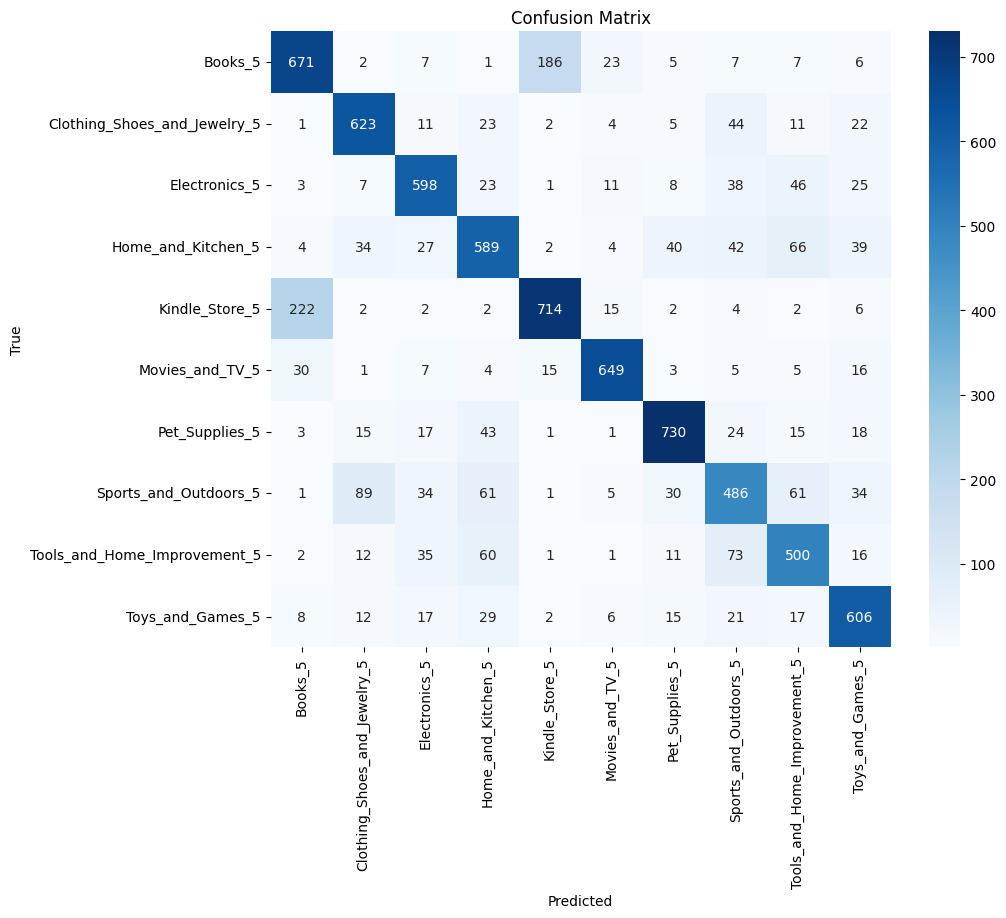

In [ ]:
import seaborn as sns

class_names = le.classes_
plt.figure(figsize=(10,8))
sns.heatmap(matrix.numpy(), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fake_reviews = df[df["fake_label"] == 1]["clean_review"]
text = " ".join(fake_reviews)


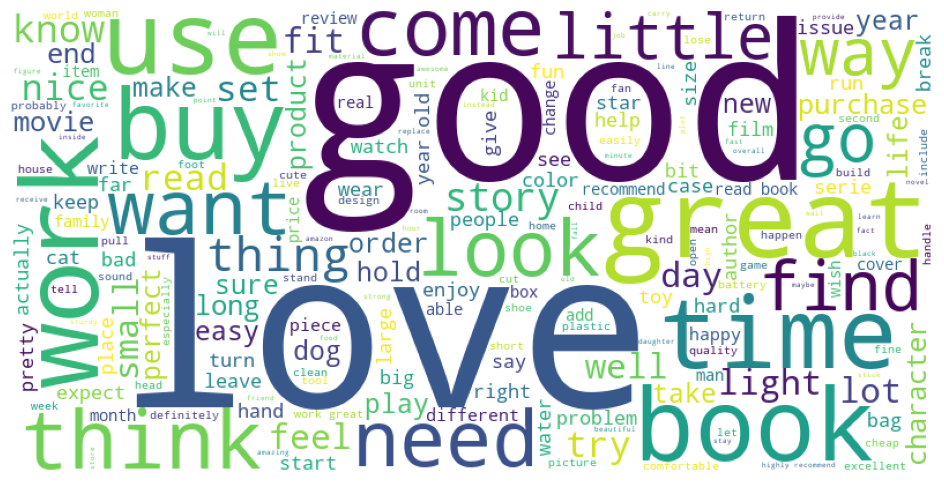

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()


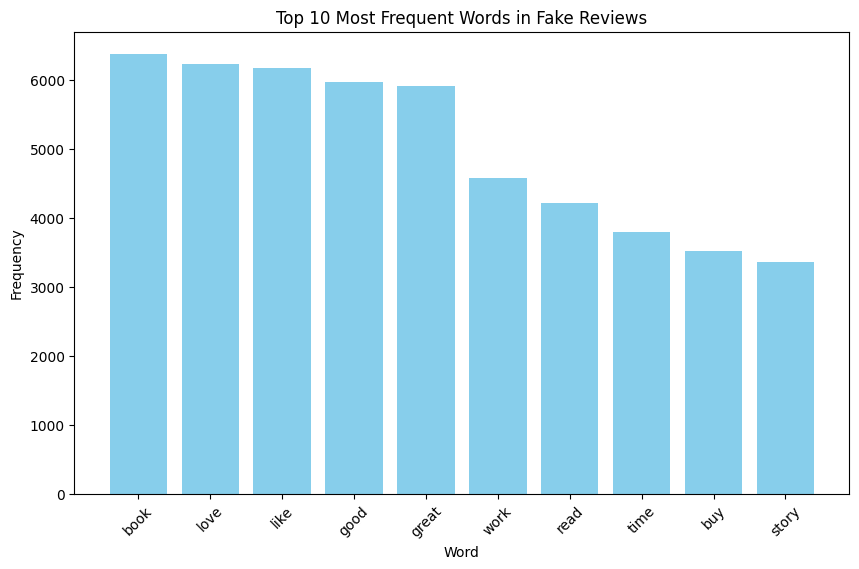

In [ ]:
from collections import Counter

words = text.split()
word_counts = Counter(words)

top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequent Words in Fake Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()